# Backtrack Testbed Notebook

Short notebook to test Bryans functions.

In [1]:
# Standard library
import sys

import numpy as np
import matplotlib.pyplot as plt

import metpy 

We want MetPy ver 1.6.1

In [2]:
# !pip install metpy --upgrade

In [3]:
print(f" Harnessing the power of MetPy version {metpy.__version__} ️")

 Harnessing the power of MetPy version 1.6.1 ️


In [4]:
sys.path.insert(1, '../sealsml')

# Azimuth Testing

In [5]:
from geometry import GeoCalculator

In [6]:
# x, y, and z

ref = np.array([[0., 0., 0.],
                [0., 0., 0.],
                [0., 0., 0.],
                [0., 0., 0.]])

target = np.array([[0., 1., 0.], # north, 0
                   [1., 0., 0.],
                   [0., -1., 0.],
                   [-1., 0., 0.]])

In [7]:
geometry_class = GeoCalculator(ref, target)
geometry_class.calculate_azimuth()

Warning, Azimuth Calculation might be wrong for vertically offset points


array([  0.,  90., 180., 270.])

# Random u and v data

In [8]:
# Set the number of examples
num_examples = 100

# Generate random u and v components using a normal distribution with mean 0 and standard deviation 5
u_data = np.random.normal(loc=0, scale=5, size=num_examples)
v_data = np.random.normal(loc=0, scale=5, size=num_examples)

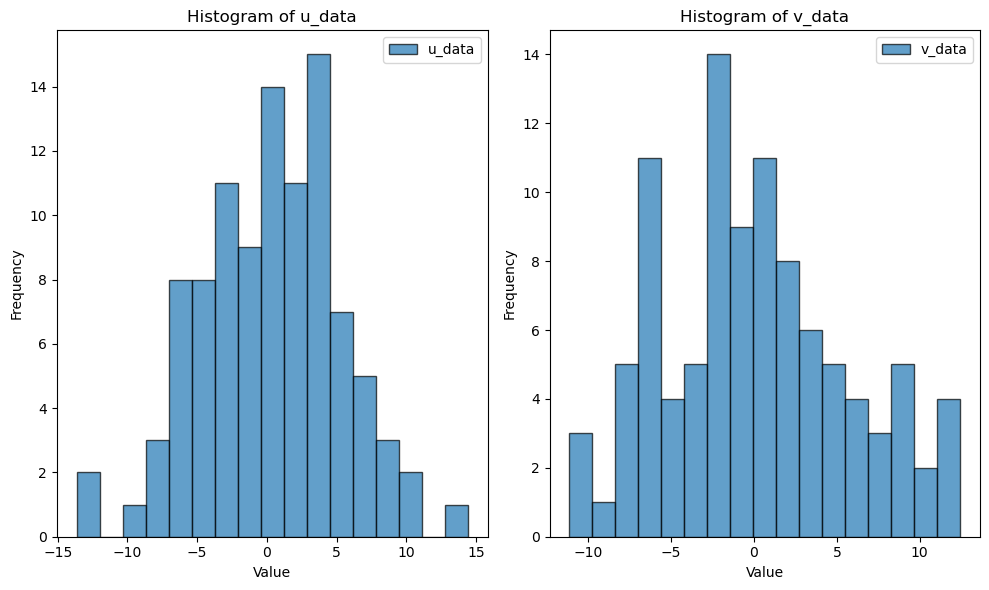

In [9]:
n_bins = 17

# Create the subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Create the histograms
ax1.hist(u_data, bins=n_bins, edgecolor='black', alpha=0.7, label='u_data')
ax2.hist(v_data, bins=n_bins, edgecolor='black', alpha=0.7, label='v_data')

# Add labels and title
ax1.set_xlabel('Value')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of u_data')
ax2.set_xlabel('Value')
ax2.set_ylabel('Frequency')
ax2.set_title('Histogram of v_data')

# Add legend
ax1.legend()
ax2.legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# Let's compare to MetPy Calc

In [10]:
from backtrack import polar

In [11]:
from metpy.calc import wind_direction
from metpy.calc import wind_speed

from metpy.units import units

In [12]:
angle, speed = polar(u_data,v_data)

In [13]:
wind_dir = wind_direction(u_data*units("m/s"), v_data*units("m/s"))

windspeed = wind_speed(u_data*units("m/s"), v_data*units("m/s"))

In [14]:
if np.allclose(speed, windspeed.magnitude, rtol=1e-6):  # Relative tolerance of 1e-4
    print("Arrays match within 6 decimal places!")
else:
    print("Arrays do not match within 6 decimal places.")

Arrays match within 6 decimal places!


Looks like the speeds match

In [15]:
if np.allclose(angle, wind_dir.magnitude, rtol=1e-6):  # Relative tolerance of 1e-4
    print("Arrays match within 6 decimal places!")
else:
    print("Arrays do not match within 6 decimal places.")

Arrays do not match within 6 decimal places.


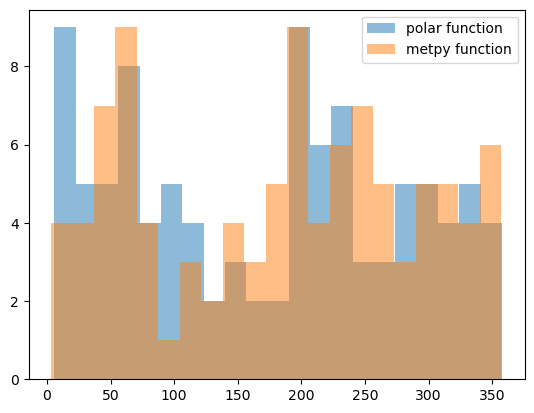

In [16]:
plt.hist(angle,    bins=21, alpha=0.5, label='polar function')
plt.hist(wind_dir, bins=21, alpha=0.5, label='metpy function')
plt.legend()

Let's test a pure east case

In [17]:
angle = np.rad2deg(np.arctan2(0, 10))
angle

0.0

In [18]:
wind_dir = wind_direction(10*units("m/s"), 0*units("m/s"))
wind_dir

array(270.) <Unit('degree')>

If we want to do this the oceanographic way:

In [19]:
wind_dir = wind_direction(10*units("m/s"), 0*units("m/s"), convention='to')
wind_dir

array(90.) <Unit('degree')>

From the north:

In [20]:
wind_dir = wind_direction(0*units("m/s"), -15*units("m/s"))
wind_dir

array(360.) <Unit('degree')>

## 1. For the polar function, I reccomend replacing it with the MetPy function, as it will follow the convention for most atmospheric scienctists and matches the current azimuth function to have 0/360 as North.  It will also be less code to maintain and test :)

Now let's test the polar 2D function

In [21]:
u_reshaped = u_data.reshape(10,10)*units("m/s")
v_reshaped = v_data.reshape(10,10)*units("m/s")

In [22]:
wind_dir_2d = wind_direction(u_reshaped, v_reshaped)
wind_dir_2d.magnitude

array([[200.93383365, 248.83766077, 191.55536218, 253.099468  ,
        175.65531975, 123.02974642, 325.8251086 , 323.64593993,
        237.10627884, 272.39490052],
       [193.7240149 , 200.19165849, 202.36893593, 244.85074709,
        303.18582613, 264.14315382,  64.36416745, 213.6105938 ,
        231.73775045, 173.32317964],
       [182.91111904, 209.16881192, 154.27333997, 340.36413407,
        245.70901146, 167.07249978, 300.86368947,  59.16098328,
        190.0107537 ,  76.80329477],
       [ 95.1612014 , 334.10361239, 259.67864643, 300.35578943,
         36.99650152, 325.85380764, 289.14216956,  69.54234887,
        227.32767029,  37.29839206],
       [146.31242057, 173.95416487,  44.68594208, 149.43188762,
        351.1833229 , 223.02029202, 283.46746773, 290.2121699 ,
        237.93281878,  70.12226775],
       [355.80106769,  76.40052992, 261.1401242 ,  59.85710226,
        313.2201169 , 357.02215311, 322.98225821,  81.7877184 ,
        115.30675058,  10.74427429],
       [ 3

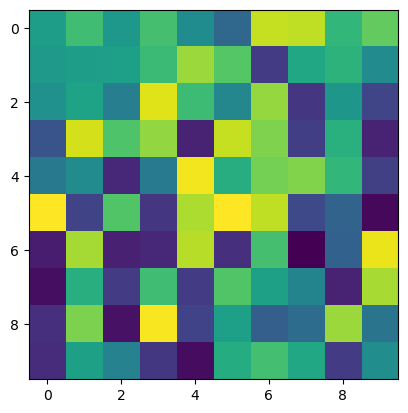

In [23]:
plt.imshow(wind_dir_2d)

In [24]:
wind_speed_2d = wind_speed(u_reshaped, 
                           v_reshaped)

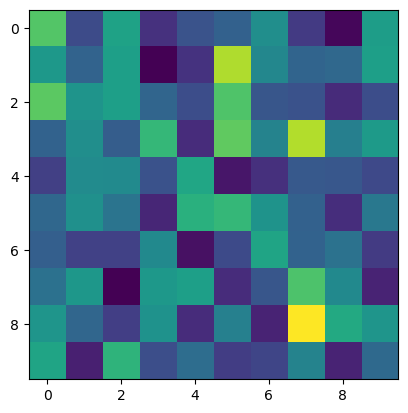

In [25]:
plt.imshow(wind_speed_2d)

## 2. For polar 2D, I reccomend using MetPy functions again as it does not require use of indicies for 2D arrays, and will match single point calculations as above as far as 0/360 being north. 

lets try to find Ch4 max, first lets make an array of random ch4 data

In [26]:
# Define number of data points
N = 5000

# Generate random frequencies and amplitudes for sin and cos
freq_sin = np.random.uniform(0.1, 0.5)
amp_sin = np.random.uniform(0.5, 1.5)
freq_cos = np.random.uniform(0.2, 0.8)
amp_cos = np.random.uniform(0.5, 1.5)

# Generate time series data as a 1D array
t = np.linspace(0, 20, N)
data = amp_sin * np.sin(freq_sin * t) + amp_cos * np.cos(freq_cos * t) + np.random.randn(N) * 0.05


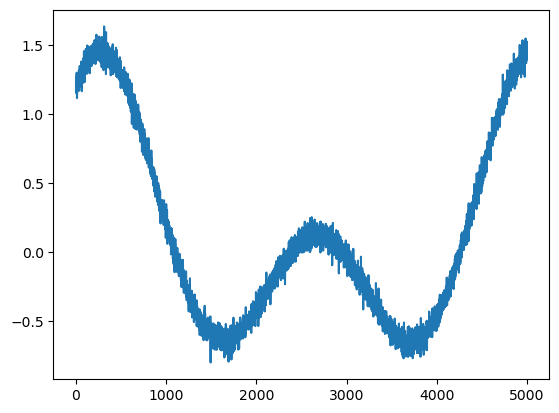

In [27]:
plt.plot(data)

In [28]:
np.size(data) == np.size(t)

True

In [29]:
from backtrack import findmaxC, findmaxCH4_noloop

In [34]:
%%time

max_c, time_max_c, ijk_max = findmaxC(data, t)

CPU times: user 487 µs, sys: 1 µs, total: 488 µs
Wall time: 490 µs


In [33]:
%%time 

max_c_noloop, time_max_c_noloop, ijk_max_noloop = findmaxCH4_noloop(data, t)

CPU times: user 41 µs, sys: 15 µs, total: 56 µs
Wall time: 53.9 µs


In [32]:
if max_c == max_c_noloop:
    print("max_c: Passed")
else:
    print("max_c: Failed")

if time_max_c == time_max_c_noloop:
    print("time_max_c: Passed")
else:
    print("time_max_c: Failed")

if ijk_max == ijk_max_noloop:
    print("ijk_max: Passed")
else:
    print("ijk_max: Failed")

max_c: Passed
time_max_c: Passed
ijk_max: Passed


## 3. Lets use the no-loop implementation, it is much faster and requires one less input